<a href="https://colab.research.google.com/github/DenisseUrenda/MachineLearning/blob/main/L01_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal

En regresión lineal simple se asume que la variable dependiente $y$ está relacionada linealmente con la variable independiente $x$. Es decir, que se cumple
$$
y = \beta_0+\beta_1x+\epsilon
$$
donde $\epsilon\sim N(0,\sigma^2)$.

Para estimar $\beta_0$ y $\beta_1$ cuando se tiene un conjunto de datos $\{(x_i,y_i)\}_{i=1}^n$, es necesario minimizar la suma de los errores cuadráticos (SSE), es decir
$$
\text{SSE} = \sum_{i=1}^ne_i^2=\sum_{i=1}^n(y_i-\hat y_i)^2
$$
donde
$$
\hat y_i = \beta_0 + \beta_1x.
$$
Para minimizar el SSE, recurrimos a cálculo diferencial
$$
\begin{aligned}
\frac{\partial\text{ SSE}}{\partial\beta_0} &= -2\sum_{i=1}^n(y_i-\beta_0-\beta_1x_i)\\
\frac{\partial\text{ SSE}}{\partial\beta_1} &= -2\beta_1\sum_{i=1}^nx_i(y_i-\beta_0-\beta_1x_i)
\end{aligned}
$$
igualamos a cero y resolvemos para $\beta_0$ y $\beta_1$, respectivamente
$$
\begin{aligned}
-2\sum_{i=1}^n(y_i-\beta_0-\beta_1x_i) &= 0 \\
\sum_{i=1}^n(y_i-\beta_0-\beta_1x_i) &=0 \\
\sum_{i=1}^ny_i-n\beta_0-\beta_1\sum_{i=1}^nx_i &=0 \\
\bar y-\beta_0-\beta_1\bar x &=0\\
\beta_0 &=  \bar y-\beta_1\bar x
\end{aligned}
$$
y
$$
\begin{aligned}
-2\beta_1\sum_{i=1}^nx_i(y_i-\beta_0-\beta_1x_i) &=0 \\
\sum_{i=1}^nx_i(y_i-\beta_0-\beta_1x_i) &=0 \\
\sum_{i=1}^nx_iy_i-\beta_0\sum_{i=1}^nx_i-\beta_1\sum_{i=1}^nx_i^2&=0 \\
\sum_{i=1}^nx_iy_i-(\bar y-\beta_1\bar x)\sum_{i=1}^nx_i-\beta_1\sum_{i=1}^nx_i^2&=0 \\
\beta_1\left(\bar x\sum_{i=1}^nx_i-\sum_{i=1}^nx_i^2\right) &= \bar y\sum_{i=1}^nx_i-\sum_{i=1}^nx_iy_i \\
\beta_1  &= \frac{n\bar x\bar y - \sum_{i=1}^nx_iy_i}{n\bar x^2 - \sum_{i=1}^nx_i^2} \\
\beta_1 &= \frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n(x_i-\bar x)^2}.
\end{aligned}
$$

La última igualdad se cumple pues
$$
\begin{aligned}
\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y) &= \sum_{i=1}^nx_iy_i-\sum_{i=1}^nx_i\bar y-\sum_{i=1}^n\bar x y_i+\sum_{i=1}^n\bar x\bar y \\
 &= \sum_{i=1}^nx_iy_i-n\bar x\bar y-n\bar x\bar y+nbar x\bar y \\
 &= \sum_{i=1}^nx_iy_i-n\bar x\bar y
\end{aligned}
$$
y
$$
\begin{aligned}
\sum_{i=1}^n(x_i-\bar x)^2 &= \sum_{i=1}^nx_i^2-2\sum_{i=1}^nx_i\bar x+\sum_{i=1}^n\bar x^2 \\
 &= \sum_{i=1}^nx_i^2-2n\bar x^2+n\bar x^2 \\
 &= \sum_{i=1}^nx_i^2-n\bar x^2.
\end{aligned}
$$

Por lo tanto,
$$
\beta_1 = \frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n(x_i-\bar x)^2} \quad\text{y}\quad \beta_0 = \bar y-\beta_1\bar x.
$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#path = "https://raw.githubusercontent.com/javierIA/ConceptosML/main/Data/ventas_publicidad.csv"
path = "https://gist.githubusercontent.com/javierIA/154c66e57da3915c75de447998c19822/raw/264cbe2e8ce1a5310d58d089c45c15a33057162b/datos.csv"
dataframe = pd.read_csv(path)
print(dataframe)

    Gasto en Publicidad        Ventas
0            593.932154  26105.234131
1            743.670430  36153.420339
2            642.487038  30554.035033
3            590.394865  28936.021218
4            481.289319  22072.792618
..                  ...           ...
95           264.872226  12675.690453
96           627.861641  27308.879490
97           118.096792   6517.410585
98           846.046026  34758.209585
99           104.225929   5623.688753

[100 rows x 2 columns]


In [ ]:
x = dataframe["Gasto en Publicidad"]
y = dataframe["Ventas"]
x, y

(0     593.932154
 1     743.670430
 2     642.487038
 3     590.394865
 4     481.289319
          ...    
 95    264.872226
 96    627.861641
 97    118.096792
 98    846.046026
 99    104.225929
 Name: Gasto en Publicidad, Length: 100, dtype: float64,
 0     26105.234131
 1     36153.420339
 2     30554.035033
 3     28936.021218
 4     22072.792618
           ...     
 95    12675.690453
 96    27308.879490
 97     6517.410585
 98    34758.209585
 99     5623.688753
 Name: Ventas, Length: 100, dtype: float64)

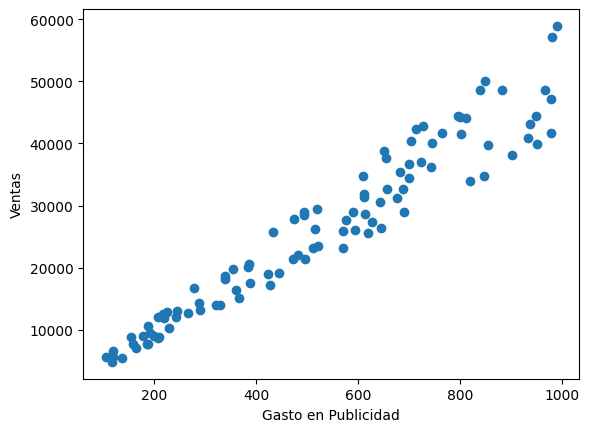

In [ ]:
plt.scatter(x, y)
plt.xlabel("Gasto en Publicidad")
plt.ylabel("Ventas")
plt.show()

## Vanilla

Recuerda que, dado un conjunto de punto $\{(x_i,y_i)\}_{i=1}^n$, la recta que mejor se ajusta a éstos es
$$
y = \beta_0 + \beta_1x
$$
donde
$$
\beta_1 = \frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n(x_i-\bar x)^2} \quad\text{y}\quad \beta_0 = \bar y-\beta_1\bar x.
$$

### Con métodos de `numpy`

In [ ]:
matriz = dataframe.to_numpy()

b1 = np.sum((matriz[:,0] - matriz[:,0].mean())\
       *(matriz[:,1] - matriz[:,1].mean()))\
       /np.sum((matriz[:,0] - matriz[:,0].mean())**2)
b0 = np.mean(matriz[:,1]) - b1*np.mean(matriz[:,0])

mensaje = f"La recta de regresion lineal es:\ny = {b0} + {b1}x"
print(mensaje)

La recta de regresion lineal es:
y = -286.70853656118925 + 50.383568474088726x


### Con métodos de `pandas`

In [ ]:
# x = dataframe["Gasto en Publicidad"]
# y = dataframe["Ventas"]

b1 = ((x-x.mean()).multiply(y-y.mean())).sum() / ((x-x.mean())**2).sum()
b0 = y.mean() - b1*x.mean()
mensaje = f"La recta de regresión lineal es:\ny = {b0} + {b1}x"
print(mensaje)

La recta de regresión lineal es:
y = -286.70853656118925 + 50.383568474088726x


Una forma más directa de calcular $\beta_1$ es notando que
$$
\beta_1 = \frac{s_{xy}}{s_x^2}.
$$
Es decir, la covarianza de $x$ y $y$ entre la varianza de $x$.

In [ ]:
S = dataframe.cov()    # Matriz de covarianza
mu = dataframe.mean()  # Vector media
b1 = S.iloc[0,1]/S.iloc[0,0]
b0 = mu.iloc[1] - b1*mu.iloc[0]

mensaje = f"La recta de regresion lineal es:\ny = {b0} + {b1}x"
print(mensaje)

La recta de regresion lineal es:
y = 184.7719866413985 + -0.021083571552347365x


Para predecir debemos usar la recta de regresión lineal

In [ ]:
prediccion = lambda x: b0 + b1*x

xnew = np.random.uniform(low=150, high=900, size=10)
yhat = prediccion(xnew)
yhat

array([44082.25828798, 35474.8796336 , 40673.2095825 ,  8669.19573075,
       18098.24980028, 34135.11985613, 42107.79487411, 12996.49428443,
       42427.12839453, 17702.21013304])

## Con libreria

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Creando instancia de clase LinearRegression
clf = LinearRegression()
x = dataframe[["Gasto en Publicidad"]]
y = dataframe[["Ventas"]]
clf.fit(x, y)

LinearRegression()

In [ ]:
mensaje = \
f"""La recta de regresion lineal es:\n\
y = {clf.intercept_[0]} + {clf.coef_[0][0]}x"""
print(mensaje)

La recta de regresion lineal es:
y = -286.70853656120016 + 50.38356847408875x


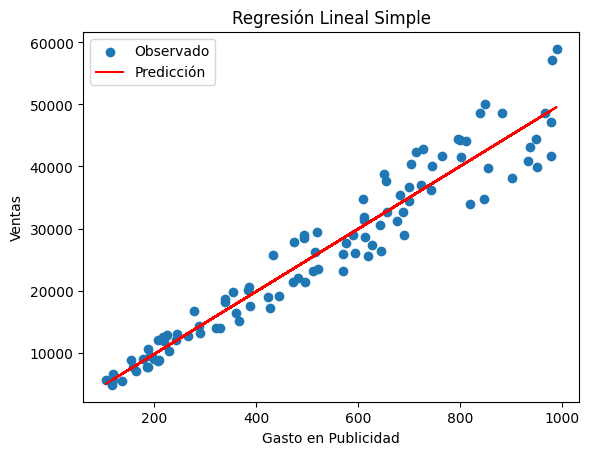

In [ ]:
pred = clf.predict(x)
plt.scatter(x, y, label = "Observado")
plt.plot(x, pred, label = "Predicción", c = "red")
plt.xlabel("Gasto en Publicidad")
plt.ylabel("Ventas")
plt.title("Regresión Lineal Simple")
plt.legend()
plt.show()